## Assignment logistic regression Affairs Python file Module 9

In [206]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [177]:
import matplotlib.pyplot as plt # for visualization import 
import seaborn as sns
%matplotlib inline


In [178]:
df =pd.read_csv('Affairs.csv',index_col=0) # index column removed from first false or 0

In [179]:
df.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 601
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   naffairs  601 non-null    int64
 1   kids      601 non-null    int64
 2   vryunhap  601 non-null    int64
 3   unhap     601 non-null    int64
 4   avgmarr   601 non-null    int64
 5   hapavg    601 non-null    int64
 6   vryhap    601 non-null    int64
 7   antirel   601 non-null    int64
 8   notrel    601 non-null    int64
 9   slghtrel  601 non-null    int64
 10  smerel    601 non-null    int64
 11  vryrel    601 non-null    int64
 12  yrsmarr1  601 non-null    int64
 13  yrsmarr2  601 non-null    int64
 14  yrsmarr3  601 non-null    int64
 15  yrsmarr4  601 non-null    int64
 16  yrsmarr5  601 non-null    int64
 17  yrsmarr6  601 non-null    int64
dtypes: int64(18)
memory usage: 89.2 KB


In [181]:
df.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
colnames = df.columns

In [183]:
colnames # names of columns 

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [184]:
print(len(df.columns)) # number of columns in out dataset

18


### DATA Preprocessing

In [188]:
df['naffairs'] = (df.naffairs>0).astype(int) # naffairs converte to 0 and 1 yes or no having arrair or not 

### Data Exploration  primary type 

In [190]:
df.groupby('naffairs').mean() # mean of other variable 

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
naffairs,,,,,,,,,,,,,,,,,
0,0.68071,0.017738,0.073171,0.146341,0.323725,0.439024,0.062084,0.272727,0.190687,0.348115,0.126386,0.104213,0.168514,0.172949,0.130820,0.108647,0.314856
1,0.82000,0.053333,0.220000,0.180000,0.320000,0.226667,0.133333,0.273333,0.286667,0.220000,0.086667,0.033333,0.080000,0.180000,0.153333,0.140000,0.413333


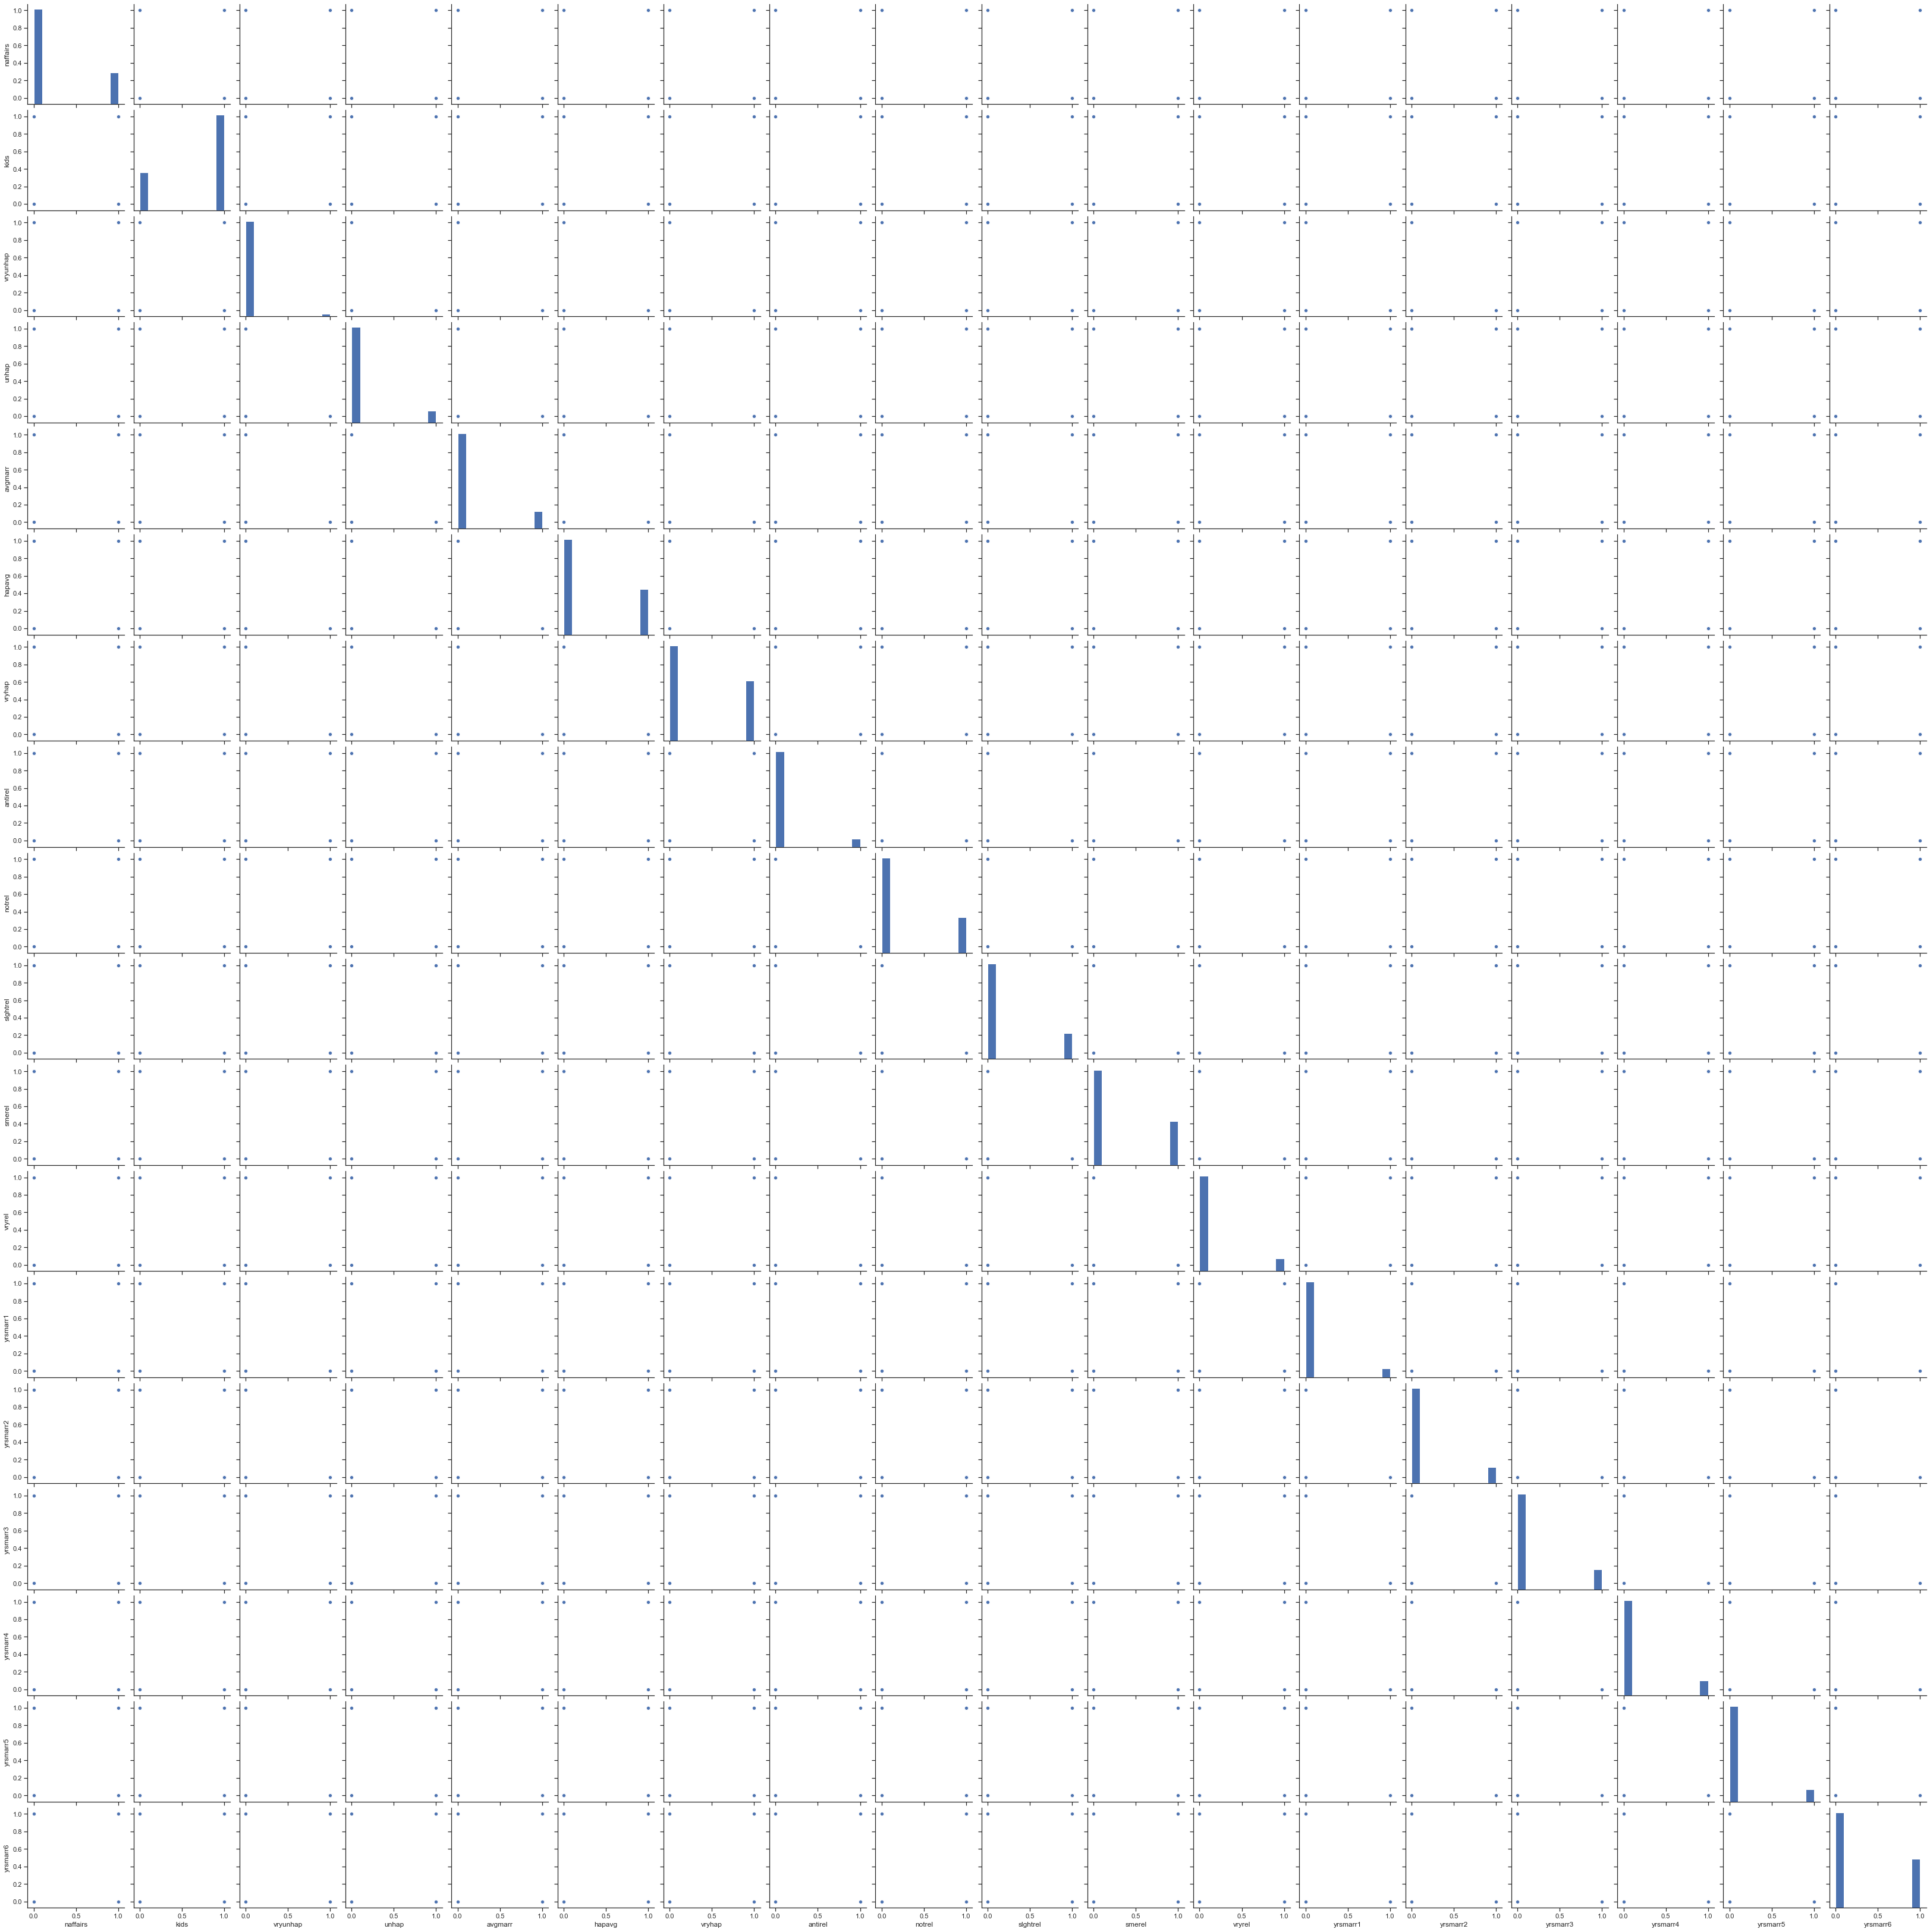

In [189]:
sns.pairplot(df) # this is to shwow each variable current situation , laer on will work on all other variable 

## Logstic Regression 

### Train test split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
colnames

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [193]:
X = df[['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6']]
y = df[['naffairs']]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### Lets make Logistic Regression 

In [195]:
from sklearn.linear_model import LogisticRegression # logistic Regression imported 

In [196]:
logmodel = LogisticRegression

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
sc = StandardScaler()

In [199]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction and Evaluations

In [201]:
pred = classifier.predict(X_test)

In [202]:
pred # predicted the values 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [203]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       136
           1       0.62      0.18      0.28        45

    accuracy                           0.77       181
   macro avg       0.70      0.57      0.57       181
weighted avg       0.74      0.77      0.72       181

[[131   5]
 [ 37   8]]
